<a href="https://colab.research.google.com/github/mits-ds/Udemy_TF2/blob/main/MM_TF2_0_Long_Distance_(v3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.8.2


In [2]:
# More imports
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
### build the dataset
# This is a nonlinear AND long-distance dataset
# (Actually, we will test long-distance vs. short-distance patterns)

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) # short distance
#   y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [4]:
# Try a linear model first - note: it is classification now!
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the network
r = model.fit(
  X, Y,
  epochs=100,
  validation_split=0.5,
)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


79/79 [==============================] - 4s 6ms/step - loss: 0.7877 - accuracy: 0.5048 - val_loss: 0.7023 - val_accuracy: 0.5064
Epoch 2/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6964 - accuracy: 0.5068 - val_loss: 0.6952 - val_accuracy: 0.4896
Epoch 3/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.4940 - val_loss: 0.6940 - val_accuracy: 0.5032
Epoch 4/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6956 - accuracy: 0.4912 - val_loss: 0.6934 - val_accuracy: 0.5204
Epoch 5/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6957 - accuracy: 0.4868 - val_loss: 0.6943 - val_accuracy: 0.5036
Epoch 6/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6958 - accuracy: 0.4920 - val_loss: 0.6939 - val_accuracy: 0.5068
Epoch 7/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.4996 - val_loss: 0.6936 - val_accuracy: 0.5100
Epoch 8/100
79/79 [======

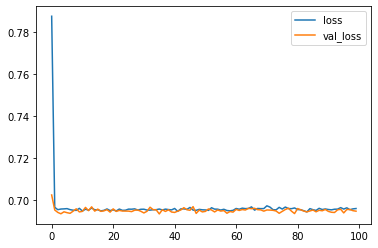

In [5]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

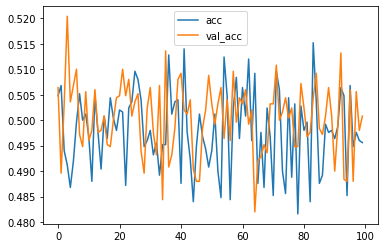

In [6]:
# Plot the accuracy too - should be around 50%
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [7]:
# Now try a simple RNN
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
# x = LSTM(5)(i)
x = SimpleRNN(5)(i)
# x = GRU(5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  # optimizer='rmsprop',
#   optimizer='adam',
  optimizer=Adam(lr=0.01),
  # optimizer=SGD(lr=0.1, momentum=0.9),
  metrics=['accuracy'],
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [8]:
# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 2s 15ms/step - loss: 0.7000 - accuracy: 0.5224 - val_loss: 0.6796 - val_accuracy: 0.5584
Epoch 2/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6754 - accuracy: 0.5628 - val_loss: 0.6643 - val_accuracy: 0.6124
Epoch 3/200
79/79 [==============================] - 1s 12ms/step - loss: 0.6545 - accuracy: 0.6252 - val_loss: 0.6284 - val_accuracy: 0.6972
Epoch 4/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6058 - accuracy: 0.7172 - val_loss: 0.5641 - val_accuracy: 0.7616
Epoch 5/200
79/79 [==============================] - 1s 13ms/step - loss: 0.5307 - accuracy: 0.7884 - val_loss: 0.4849 - val_accuracy: 0.8152
Epoch 6/200
79/79 [==============================] - 1s 13ms/step - loss: 0.4531 - accuracy: 0.8264 - val_loss: 0.4098 - val_accuracy: 0.8432
Epoch 7/200
79/79 [==============================] - 1s 11ms/step - loss: 0.3896 - accuracy: 0.8644 - val_loss: 0.3691 - val_accuracy: 0.8668
Epoch 

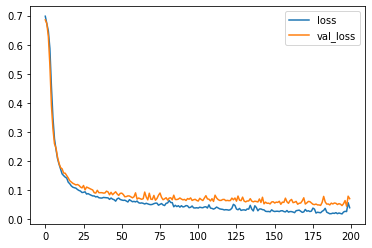

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

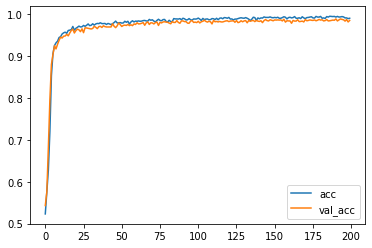

In [ ]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Now change to the long distance problem

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [ ]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 12ms/step - loss: 0.7009 - accuracy: 0.4996 - val_loss: 0.6948 - val_accuracy: 0.5088
Epoch 2/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6944 - accuracy: 0.5128 - val_loss: 0.6951 - val_accuracy: 0.5076
Epoch 3/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6951 - accuracy: 0.5112 - val_loss: 0.6940 - val_accuracy: 0.5160
Epoch 4/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6933 - accuracy: 0.5112 - val_loss: 0.6935 - val_accuracy: 0.5024
Epoch 5/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6946 - accuracy: 0.5092 - val_loss: 0.6932 - val_accuracy: 0.5140
Epoch 6/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6923 - accuracy: 0.5236 - val_loss: 0.6952 - val_accuracy: 0.5072
Epoch 7/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6922 - accuracy: 0.5248 - val_loss: 0.6935 - val_accuracy: 0.5088
Epoch 

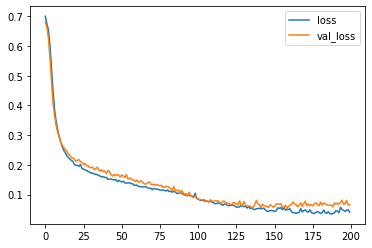

In [9]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

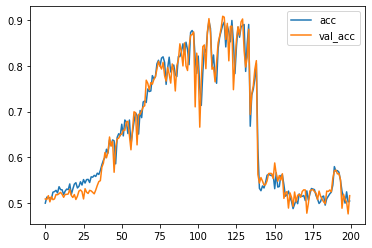

In [ ]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6951 - accuracy: 0.4972 - val_loss: 0.6948 - val_accuracy: 0.5068
Epoch 2/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.5140 - val_loss: 0.6940 - val_accuracy: 0.4960
Epoch 3/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.5072 - val_loss: 0.6948 - val_accuracy: 0.5036
Epoch 4/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6929 - accuracy: 0.5048 - val_loss: 0.6952 - val_accuracy: 0.5044
Epoch 5/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.5120 - val_loss: 0.6940 - val_accuracy: 0.4968
Epoch 6/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6924 - accuracy: 0.5128 - val_loss: 0.6943 - val_accuracy: 0.4984
Epoch 7/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6928 - accuracy: 0.5100 - val_loss: 0.6947 - val_accuracy: 0.5008
Epoch 8/200
7

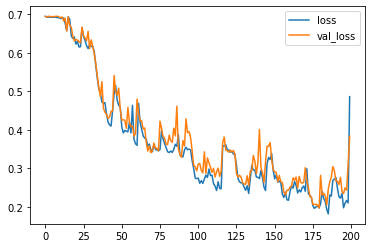

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

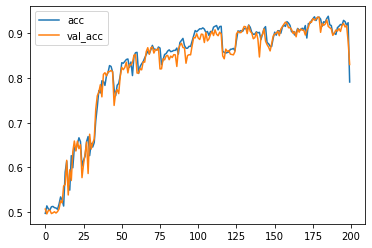

In [ ]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Make the problem harder by making T larger
T = 20
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [ ]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 18ms/step - loss: 0.7027 - accuracy: 0.4816 - val_loss: 0.6930 - val_accuracy: 0.5052
Epoch 2/200
79/79 [==============================] - 1s 16ms/step - loss: 0.6940 - accuracy: 0.5000 - val_loss: 0.6946 - val_accuracy: 0.5068
Epoch 3/200
79/79 [==============================] - 1s 16ms/step - loss: 0.6920 - accuracy: 0.5136 - val_loss: 0.6973 - val_accuracy: 0.5020
Epoch 4/200
79/79 [==============================] - 1s 16ms/step - loss: 0.6942 - accuracy: 0.5048 - val_loss: 0.6945 - val_accuracy: 0.4984
Epoch 5/200
79/79 [==============================] - 1s 16ms/step - loss: 0.6927 - accuracy: 0.5068 - val_loss: 0.6942 - val_accuracy: 0.5088
Epoch 6/200
79/79 [==============================] - 1s 16ms/step - loss: 0.6934 - accuracy: 0.5076 - val_loss: 0.6945 - val_accuracy: 0.5036
Epoch 7/200
79/79 [==============================] - 1s 16ms/step - loss: 0.6924 - accuracy: 0.5204 - val_loss: 0.6951 - val_accuracy: 0.5004
Epoch 

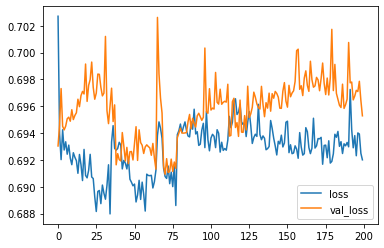

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

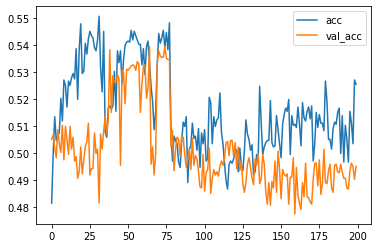

In [ ]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6950 - accuracy: 0.5128 - val_loss: 0.6957 - val_accuracy: 0.4920
Epoch 2/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6926 - accuracy: 0.5152 - val_loss: 0.6974 - val_accuracy: 0.4920
Epoch 3/200
79/79 [==============================] - 1s 6ms/step - loss: 0.6929 - accuracy: 0.5192 - val_loss: 0.6955 - val_accuracy: 0.4916
Epoch 4/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6924 - accuracy: 0.5248 - val_loss: 0.6950 - val_accuracy: 0.4952
Epoch 5/200
79/79 [==============================] - 1s 6ms/step - loss: 0.6917 - accuracy: 0.5232 - val_loss: 0.6951 - val_accuracy: 0.4948
Epoch 6/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6910 - accuracy: 0.5232 - val_loss: 0.6979 - val_accuracy: 0.4968
Epoch 7/200
79/79 [==============================] - 1s 6ms/step - loss: 0.6915 - accuracy: 0.5240 - val_loss: 0.6976 - val_accuracy: 0.4952
Epoch 8/200


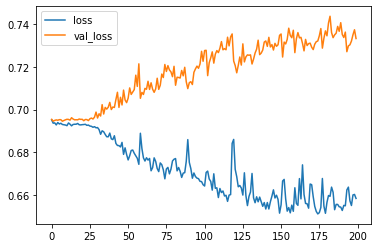

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

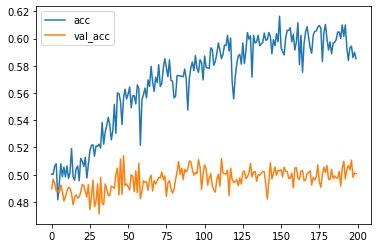

In [ ]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Now test our GRU
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = GRU(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

Epoch 1/400
79/79 [==============================] - 1s 9ms/step - loss: 0.6950 - accuracy: 0.4860 - val_loss: 0.6950 - val_accuracy: 0.4904
Epoch 2/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6942 - accuracy: 0.5080 - val_loss: 0.6976 - val_accuracy: 0.4940
Epoch 3/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6943 - accuracy: 0.5056 - val_loss: 0.6958 - val_accuracy: 0.4956
Epoch 4/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6938 - accuracy: 0.4996 - val_loss: 0.6962 - val_accuracy: 0.4996
Epoch 5/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6933 - accuracy: 0.5180 - val_loss: 0.6959 - val_accuracy: 0.4964
Epoch 6/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6939 - accuracy: 0.4900 - val_loss: 0.6958 - val_accuracy: 0.4916
Epoch 7/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6939 - accuracy: 0.4936 - val_loss: 0.6952 - val_accuracy: 0.4928
Epoch 8/400
7

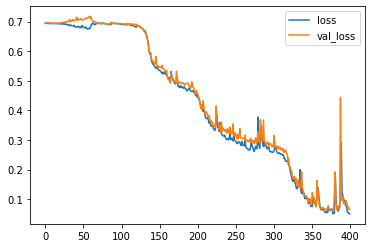

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

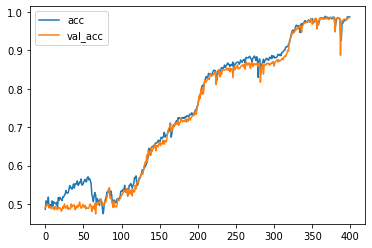

In [ ]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Make the problem harder by making T larger
T = 30
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [ ]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(15)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

Epoch 1/400
79/79 [==============================] - 1s 10ms/step - loss: 0.6938 - accuracy: 0.5124 - val_loss: 0.6950 - val_accuracy: 0.4940
Epoch 2/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6925 - accuracy: 0.5200 - val_loss: 0.6945 - val_accuracy: 0.4964
Epoch 3/400
79/79 [==============================] - 1s 6ms/step - loss: 0.6927 - accuracy: 0.5204 - val_loss: 0.6955 - val_accuracy: 0.4960
Epoch 4/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6916 - accuracy: 0.5224 - val_loss: 0.6943 - val_accuracy: 0.4956
Epoch 5/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6922 - accuracy: 0.5228 - val_loss: 0.6952 - val_accuracy: 0.4960
Epoch 6/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6920 - accuracy: 0.5232 - val_loss: 0.6945 - val_accuracy: 0.4960
Epoch 7/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6921 - accuracy: 0.5252 - val_loss: 0.6949 - val_accuracy: 0.4912
Epoch 8/400


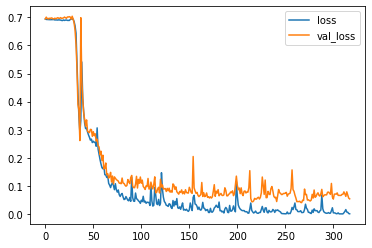

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

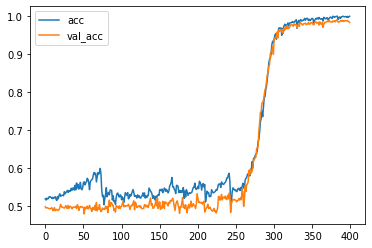

In [ ]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [13]:
# Now try a LSTM with Global Max Pooling
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 2
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=150,
  validation_split=0.5,
)

Epoch 1/150


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


79/79 [==============================] - 2s 11ms/step - loss: 0.6961 - accuracy: 0.5004 - val_loss: 0.6932 - val_accuracy: 0.5128
Epoch 2/150
79/79 [==============================] - 1s 8ms/step - loss: 0.6938 - accuracy: 0.5012 - val_loss: 0.6923 - val_accuracy: 0.5224
Epoch 3/150
79/79 [==============================] - 1s 7ms/step - loss: 0.6939 - accuracy: 0.5036 - val_loss: 0.6930 - val_accuracy: 0.5112
Epoch 4/150
79/79 [==============================] - 1s 7ms/step - loss: 0.6930 - accuracy: 0.5084 - val_loss: 0.6928 - val_accuracy: 0.5196
Epoch 5/150
79/79 [==============================] - 0s 6ms/step - loss: 0.6922 - accuracy: 0.5204 - val_loss: 0.6933 - val_accuracy: 0.5128
Epoch 6/150
79/79 [==============================] - 0s 6ms/step - loss: 0.6918 - accuracy: 0.5220 - val_loss: 0.6946 - val_accuracy: 0.5100
Epoch 7/150
79/79 [==============================] - 1s 6ms/step - loss: 0.6916 - accuracy: 0.5240 - val_loss: 0.6944 - val_accuracy: 0.5028
Epoch 8/150
79/79 [=====

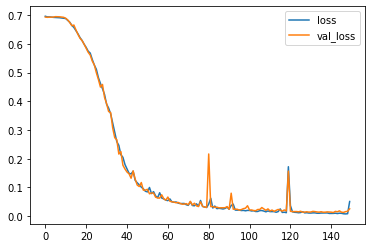

In [14]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

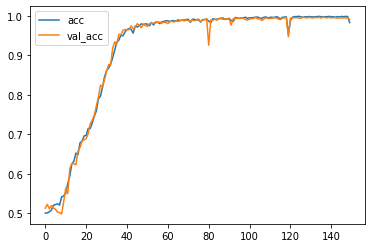

In [15]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()